In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('..')
import os
from tools.common import resize_set
from sklearn.linear_model import LogisticRegression
import h5py
from keras.models import model_from_json
from tools.common import disp_grid
def load_h5(filename):
    f = h5py.File(filename)
    X = f['X']
    nb = f.attrs['nb']
    X = X[0:nb]
    X = np.array(X)
    X = X[np.isnan(X).sum(axis=(1,2,3))==0]
    return X

/home/mcherti/work/code/external/scikit-learn/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using Theano backend.


In [80]:
model_folder = '../tools/models/external/all_vs_fake_jobset83'
arch = (open(os.path.join(model_folder, 'model.json'))).read()
model = model_from_json(arch)
model.load_weights(os.path.join(model_folder, 'model.pkl'))

In [77]:
model_folder = '../tools/models/external/mnist_classifier_multilabel'
arch = (open(os.path.join(model_folder, 'model.json'))).read()
model = model_from_json(arch)
model.load_weights(os.path.join(model_folder, 'model.pkl'))

## mnist

In [31]:
data = np.load('../exported_data/datasets/all_vs_fake_jobset83.npz')
X, y = data['X']/255., data['y']
print( (X>0.5).mean() )

0.134424156201


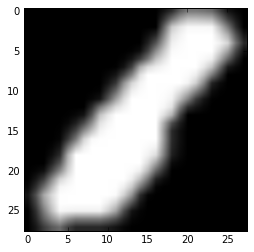

(array([ 44109745.,         0.,         0.,         0.,         0.,
                0.,         0.,         0.,         0.,   6850255.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

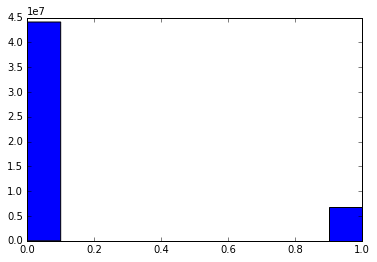

In [32]:
plt.hist(X.flatten())

## usps

In [35]:
data = np.load('/home/mcherti/work/data/usps/data.npz')

In [73]:
X, y = data['X'], data['y']
print(X.shape)
X = np.pad(X, ((0,0), (0, 0), (2, 2), (2, 2)), 'constant')
print(X.shape)

(11000, 1, 16, 16)
(11000, 1, 20, 20)


In [74]:
X = resize_set(X, 28, 28)

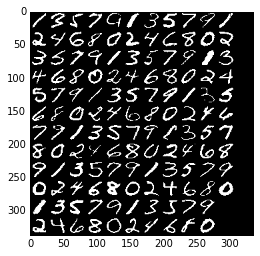

In [75]:
img=disp_grid(X[0:130]>0.5)
plt.imshow(img)

In [82]:
((model.predict((X>0.5))[:,0:10].argmax(axis=1)) == y).mean()

0.89100000000000001